In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'N/A'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'N/A'
    

In [4]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [5]:
df.job_simp.value_counts()

data scientist    279
N/A               184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [6]:
df['seniority'] = df['Job Title'].apply(seniority)

In [7]:
df.seniority.value_counts()

N/A       520
senior    220
jr          2
Name: seniority, dtype: int64

In [8]:
# fix state los angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
IN     10
WI     10
MO      9
AZ      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
NE      4
OR      4
LA      4
NM      3
KS      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [9]:
# job description length

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [10]:
# competitor count

df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [11]:
#hourly wage annual


df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis = 1)

In [12]:
df[df.hourly==1][['hourly', 'min_salary', 'max_salary']]




,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [13]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [14]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [15]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salaty,same_state,company_age,python,r_studio,spark,aws,excel,sql,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.001348,0.225067,0.237197,0.522911,0.512129,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.036711,0.417908,0.425651,0.499812,0.500190,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salaty',
       'company_txt', 'job_state', 'same_state', 'company_age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'sql', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot:>

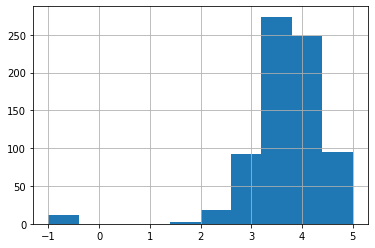

In [17]:
df.Rating.hist()

<AxesSubplot:>

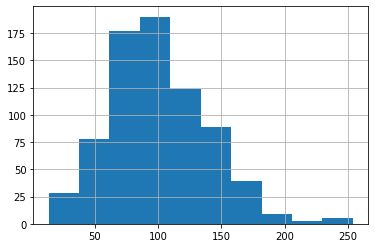

In [18]:
df.avg_salaty.hist()


<AxesSubplot:>

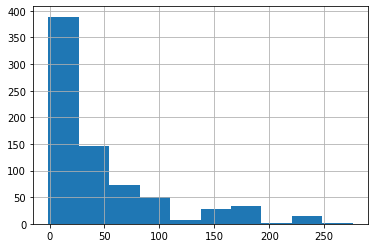

In [19]:
df.company_age.hist()

<AxesSubplot:>

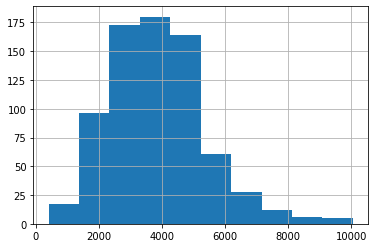

In [20]:
df.desc_len.hist()

<AxesSubplot:>

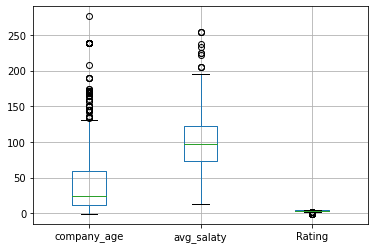

In [21]:
df.boxplot(column = ['company_age', 'avg_salaty', 'Rating'])

In [22]:
df_corr = df[['company_age', 'avg_salaty', 'Rating', 'desc_len']].corr()

<AxesSubplot:>

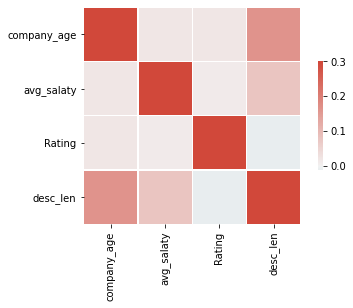

In [23]:
cmap = sns.diverging_palette(220, 15, as_cmap=True)
sns.heatmap(df_corr, vmax=.3, cmap=cmap, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salaty',
       'company_txt', 'job_state', 'same_state', 'company_age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'sql', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [25]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Sector', 'Revenue',
    'company_txt', 'job_state', 'same_state', 'python','r_studio', 'spark', 'aws',
    'excel', 'sql', 'job_simp', 'seniority']] 













graph for Location: total = 200


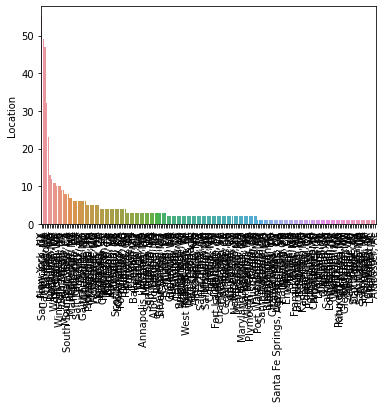

graph for Headquarters: total = 198


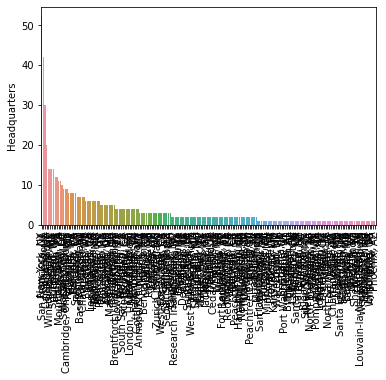

graph for Size: total = 9


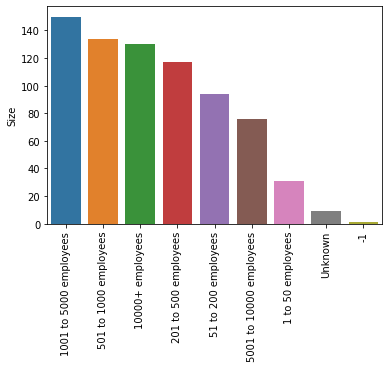

graph for Type of ownership: total = 11


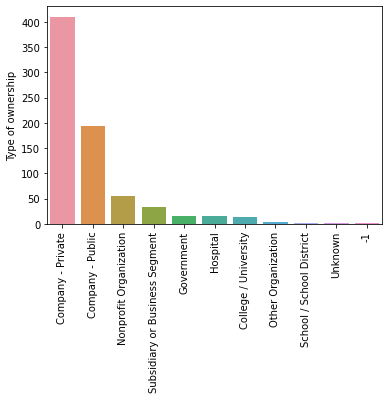

graph for Sector: total = 25


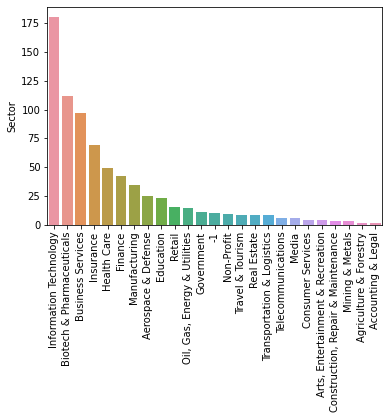

graph for Revenue: total = 14


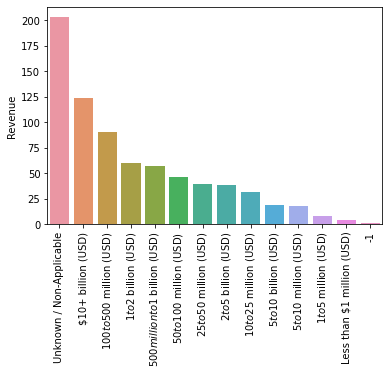

graph for company_txt: total = 343


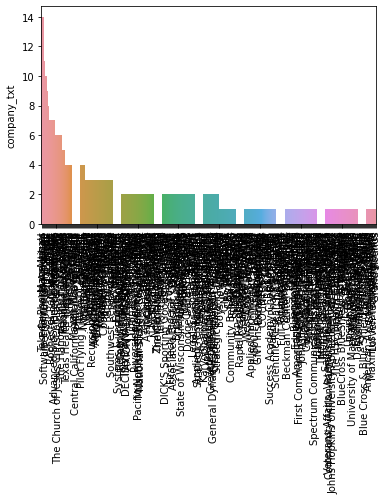

graph for job_state: total = 37


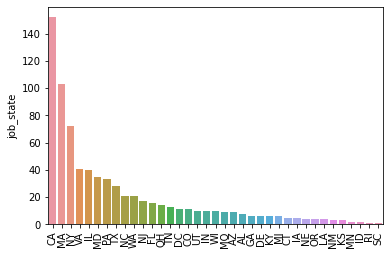

graph for same_state: total = 2


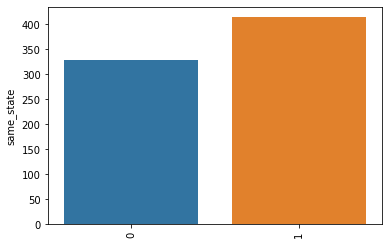

graph for python: total = 2


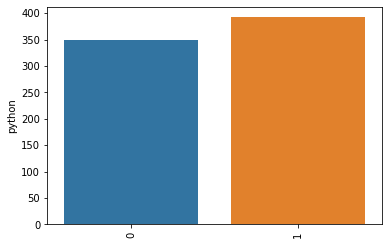

graph for r_studio: total = 2


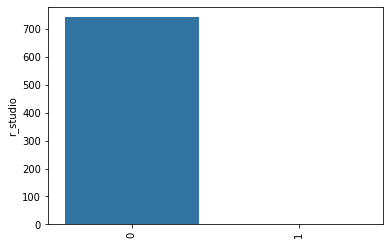

graph for spark: total = 2


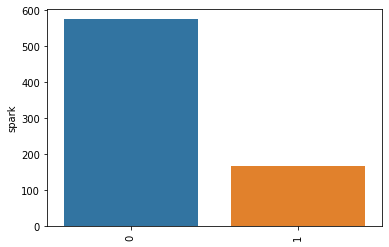

graph for aws: total = 2


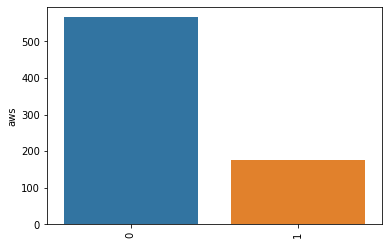

graph for excel: total = 2


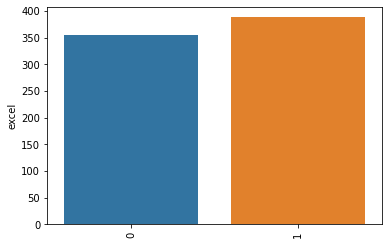

graph for sql: total = 2


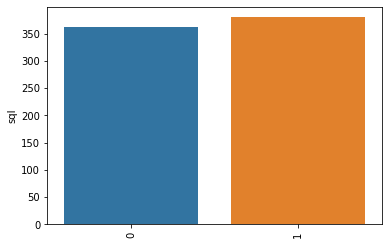

graph for job_simp: total = 7


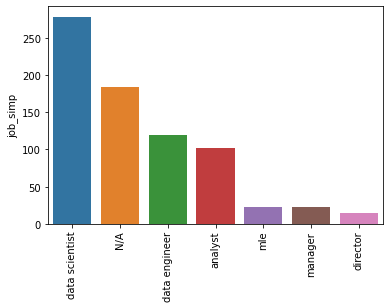

graph for seniority: total = 3


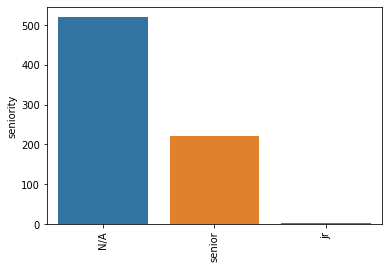

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

In [27]:
df_cat1 = df[['Location', 'Headquarters', 'company_txt']] 

graph for Location: total = 20


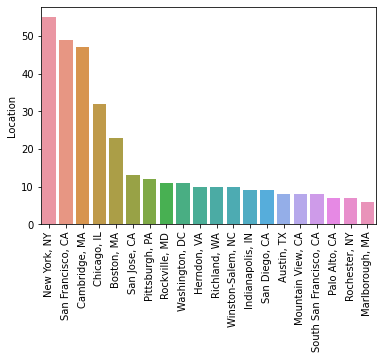

graph for Headquarters: total = 20


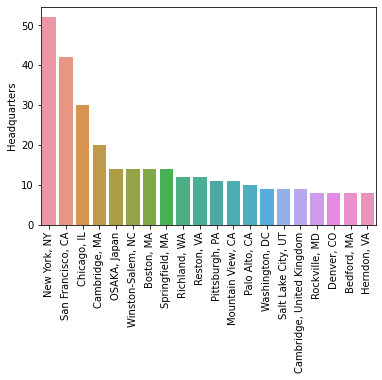

graph for company_txt: total = 20


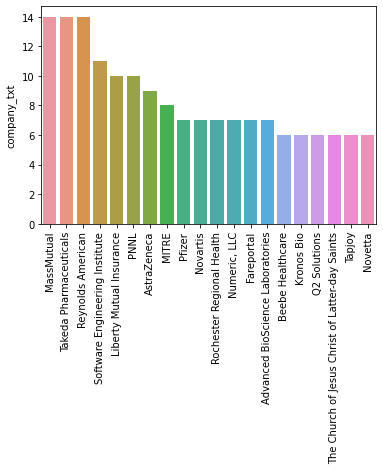

In [28]:
for i in df_cat1.columns:
    cat_num = df_cat1[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salaty',
       'company_txt', 'job_state', 'same_state', 'company_age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'sql', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [30]:
  pd.pivot_table(df, index = 'job_simp', values = 'avg_salaty')

,avg_salaty
job_simp,
N/A,84.853261
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818


In [31]:
  pd.pivot_table(df, index = ['job_simp', 'sql'], values = 'avg_salaty')

avg_salaty
job_simp       sql            
N/A            0     83.706452
               1     90.982759
analyst        0     53.314815
               1     70.373333
data engineer  0    109.687500
               1    103.827586
data scientist 0    121.310924
               1    114.778125
director       0    168.909091
               1    167.500000
manager        0     92.611111
               1     78.076923
mle            0    113.444444
               1    135.423077

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salaty',
       'company_txt', 'job_state', 'same_state', 'company_age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'sql', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [33]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salaty').sort_values('job_state', ascending = False)


avg_salaty
job_state job_simp                  
WI        data scientist  113.500000
          analyst          58.833333
          N/A              54.000000
WA        data scientist   99.764706
          analyst          54.500000
...                              ...
AZ        N/A             124.500000
          data scientist   69.500000
AL        data engineer    65.000000
          analyst          62.200000
          N/A              43.750000

[114 rows x 1 columns]

In [34]:
pd.set_option('display.max_rows', None)

In [35]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salaty', aggfunc = 'count').sort_values('job_state', ascending = False)


avg_salaty
job_state job_simp                  
WI        data scientist           3
          analyst                  3
          N/A                      4
WA        data scientist          17
          analyst                  3
          N/A                      1
VA        mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
          N/A                      5
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        data scientist          13
          data engineer            8
          N/A                      7
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        N/A                      1
RI        analyst                  1
PA        data scientist           6
          analyst                  8
          data engineer            1
          N/A                      8
          manager                  3
          mle                      7
OR        data scientist           3
          data engineer            1
OH        data scientist           7
          analyst                  4
          N/A                      3
NY        mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
          N/A                     12
NM        data scientist           3
NJ        data engineer            2
          N/A                      1
          analyst                  6
          director                 2
          data scientist           4
          manager                  2
NE        N/A                      4
NC        data scientist           3
          data engineer            6
          N/A                     12
MO        manager                  1
          data scientist           3
          analyst                  2
          N/A                      3
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        data scientist          13
          data engineer            3
          analyst                  3
          N/A                     16
MA        manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
          N/A                     46
LA        N/A                      1
          analyst                  1
          data engineer            2
KY        data scientist           2
          N/A                      4
KS        mle                      3
IN        data scientist           2
          data engineer            4
          N/A                      4
IL        N/A                      6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
          analyst                  3
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        N/A                      3
          data scientist           3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        N/A                      6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        data scientist           2
          N/A                      3
CO        data scientist           3
          analyst                  1
          N/A                      3
          mle                      1
          data engineer            3
CA        mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst                 18
          N/A                 

In [36]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salaty').sort_values('avg_salaty', ascending = False)

,avg_salaty
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salaty',
       'company_txt', 'job_state', 'same_state', 'company_age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'sql', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [38]:
# rating, idustry, sector, revenue, number of comp, hourly, employer provided, python, r, , sql, spark, aws, excel, desc_len, Type of ownership
#

In [39]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python', 
 'r_studio','sql', 'spark', 'aws', 'excel', 'Type of ownership', 'avg_salaty']]


In [40]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salaty').sort_values('avg_salaty', ascending = False))

Rating
        avg_salaty
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salaty
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salaty' not 1-dimensional

In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salaty',
       'company_txt', 'job_state', 'same_state', 'company_age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'sql', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salaty',
       'company_txt', 'job_state', 'same_state', 'company_age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'sql', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [43]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salaty', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [44]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

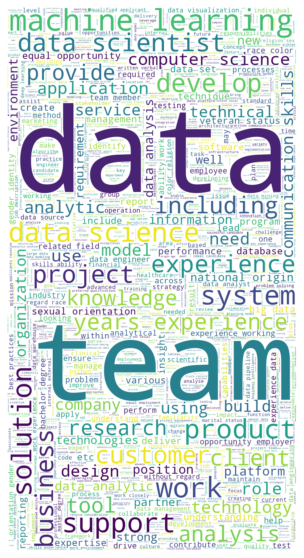

In [46]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()